In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [45]:
df=pd.read_csv("players_20.csv")
df.head(15)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+6,66+6,66+6,66+6,68+6,63+6,53+6,53+6,53+6,63+6
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,62+3,62+3,62+3,65+3,61+3,54+3,54+3,54+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+6,61+6,61+6,61+6,67+6,61+6,47+6,47+6,47+6,61+6
3,200389,https://sofifa.com/player/200389/jan-oblak/200002,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+6,63+6,63+6,63+6,66+6,61+6,49+6,49+6,49+6,61+6
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,67+3,67+3,67+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,84+3,84+3,84+3,79+3,81+3,88+3,88+3,88+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,82+3,82+3,82+3,82+3,82+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,71+6,67+6,67+6,67+6,71+6,67+6,58+6,58+6,58+6,67+6


In [46]:
df.shape

(18483, 106)

#### we have 106 columns and we'll not work on all of them to predict the ratings, so we will just sort the most important one of them and leave others

In [47]:
for column in df.columns:
    print(column)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club_name
league_name
league_rank
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penal

In [48]:
df=df[['overall','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
       'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]
df.head(15)

,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,94,88,95,70,92,88,97,93,94,92,...,94,75,96,37,26,6,11,15,14,8
1,93,84,94,89,83,87,89,81,76,77,...,82,85,95,32,24,7,11,15,14,11
2,92,87,87,62,87,87,96,88,87,81,...,90,90,94,26,29,9,9,15,15,11
3,91,13,11,15,43,13,12,13,14,40,...,65,11,68,12,18,87,92,78,90,89
4,91,81,84,61,89,83,95,83,79,83,...,89,88,91,27,22,11,12,6,8,8
5,91,93,82,55,92,82,86,85,83,91,...,94,79,91,58,51,15,13,5,10,13
6,90,18,14,11,61,14,21,18,12,63,...,70,25,70,13,10,88,85,88,88,90
7,90,53,52,86,78,45,70,60,70,81,...,65,62,89,92,85,13,10,13,11,11
8,90,86,72,55,92,76,87,85,78,88,...,91,82,92,76,71,13,9,7,14,9
9,90,79,90,59,84,79,89,83,69,75,...,84,77,91,43,41,14,14,9,11,14


In [49]:
df.shape

(18483, 34)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   overall                     18483 non-null  int64
 1   attacking_crossing          18483 non-null  int64
 2   attacking_finishing         18483 non-null  int64
 3   attacking_heading_accuracy  18483 non-null  int64
 4   attacking_short_passing     18483 non-null  int64
 5   attacking_volleys           18483 non-null  int64
 6   skill_dribbling             18483 non-null  int64
 7   skill_curve                 18483 non-null  int64
 8   skill_fk_accuracy           18483 non-null  int64
 9   skill_long_passing          18483 non-null  int64
 10  skill_ball_control          18483 non-null  int64
 11  movement_acceleration       18483 non-null  int64
 12  movement_sprint_speed       18483 non-null  int64
 13  movement_agility            18483 non-null  int64
 14  moveme

#### we don't have any null values for the player attributes, so we don't need to care about the null values

In [54]:
df.isnull().sum().sum()

0

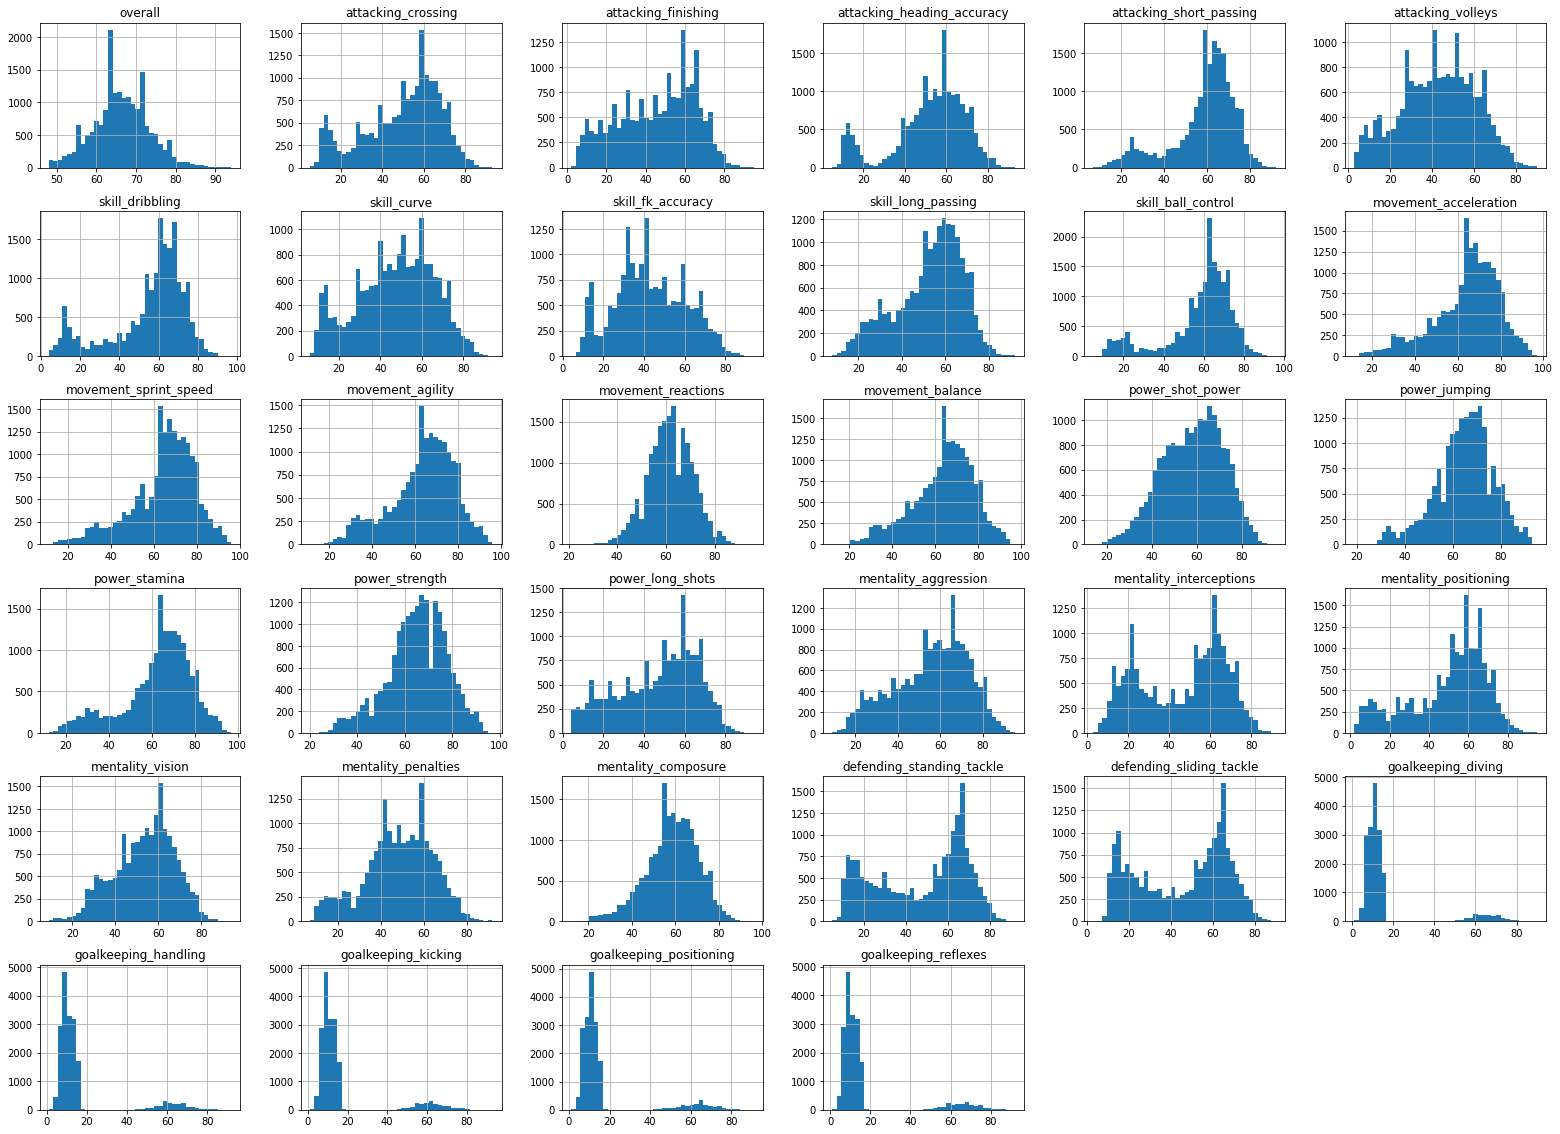

In [55]:
df.hist(bins=40,figsize=(27,20))
plt.show()